# EDA and Cleaning #

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn import metrics
from scipy import stats
from sklearn.compose import TransformedTargetRegressor

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
pd.options.display.max_columns = 99

In [3]:
train = pd.read_csv('../datasets/train.csv', keep_default_na=False, na_values='')
train.columns = train.columns.str.lower().str.replace(' ','_')
test = pd.read_csv('../datasets/test.csv', keep_default_na=False, na_values='')
test.columns = test.columns.str.lower().str.replace(' ','_')

In [4]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
test.shape, train.shape

((878, 80), (2051, 81))

In [7]:
train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

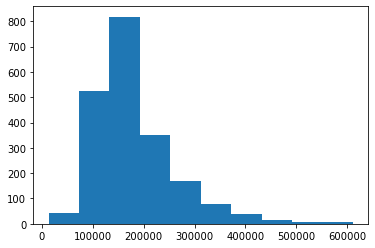

In [8]:
plt.hist(train['saleprice'],bins=10);

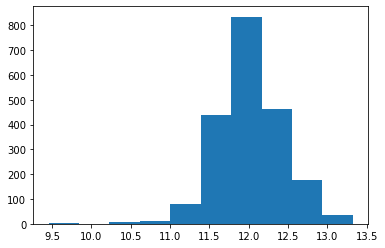

In [9]:
plt.hist(np.log(train['saleprice']), bins=10);

In [10]:
train.shape

(2051, 81)

In [11]:
train.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 81, dtype: object

In [12]:
train.corr().tail()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
pool_area,0.055696,0.005825,-0.004585,0.156575,0.115102,0.006558,-0.005806,0.003728,-0.022382,0.012422,0.075925,0.061026,-0.039209,0.061503,0.129995,0.012642,-0.006854,0.113034,0.043704,0.066097,0.010458,0.001294,0.027438,-0.012986,0.072500,0.107769,-0.013425,0.021566,0.045876,0.128373,0.073965,-0.015636,-0.006522,0.033114,1.000000,0.017661,-0.043118,-0.053768,0.023106
misc_val,-0.012683,0.004223,-0.027485,0.051676,0.093922,0.022099,0.014269,0.000626,-0.001704,0.079219,0.130042,-0.005515,-0.005888,0.125600,0.139496,0.004413,-0.005756,0.113673,-0.003515,0.050212,0.003293,0.055789,0.012274,0.031474,0.100175,0.023372,0.004736,0.003053,0.033641,0.085091,0.109919,0.015049,-0.004887,0.007122,0.017661,1.000000,0.019483,0.017269,-0.007375
mo_sold,0.127723,-0.032735,0.013027,-0.017389,0.003197,0.019242,-0.003144,-0.007083,0.011568,-0.001472,-0.010534,-0.013945,0.020043,0.003915,0.027038,0.030248,0.024471,0.049644,-0.009609,0.026370,0.049390,0.010521,0.068281,0.047143,0.054154,0.018228,0.013538,0.020801,0.009964,0.018500,0.043632,0.004455,0.020036,0.029329,-0.043118,0.019483,1.000000,-0.147494,0.032735
yr_sold,-0.975747,0.008476,-0.032870,0.009112,-0.029454,-0.011578,0.047664,-0.003559,0.042744,-0.018719,0.037978,-0.000013,-0.043683,-0.004280,-0.007432,-0.011915,0.001288,-0.015891,0.035344,-0.010072,0.007140,0.001987,-0.011692,0.020800,-0.022041,0.006887,-0.005346,-0.009996,-0.003589,-0.000912,-0.025895,-0.006256,0.019424,-0.017624,-0.053768,0.017269,-0.147494,1.000000,-0.015203
saleprice,-0.051398,-0.255052,-0.087335,0.341842,0.296566,0.800207,-0.097019,0.571849,0.550370,0.512230,0.423519,0.016255,0.190210,0.628925,0.618486,0.248452,-0.041594,0.697038,0.283662,-0.045328,0.537969,0.283001,0.137067,-0.125444,0.504014,0.471093,0.533922,0.648220,0.650270,0.326490,0.333476,-0.135656,0.048732,0.134581,0.023106,-0.007375,0.032735,-0.015203,1.000000


#### Outside Research ####
Home square footage. Only includes liveable spaces... does not include porch, garage, pools, or unfinished basements
https://www.apartmenttherapy.com/house-square-footage-meaning-36734380

In [13]:
train['total_baths'] = train['bsmt_full_bath'] + train['bsmt_half_bath'] + train['full_bath'] + train['half_bath']
train['home_sqft'] = train['gr_liv_area'] + train['bsmtfin_sf_1'] + train['bsmtfin_sf_2']
train['total_porches'] = train['open_porch_sf'] + train['enclosed_porch'] + train['3ssn_porch'] + train['screen_porch']
train['bsmt'] = train['total_bsmt_sf'] - (train['bsmtfin_sf_1'] + train['bsmtfin_sf_2']+train['bsmt_unf_sf'])
train['sqft'] = train['gr_liv_area'] - (train['1st_flr_sf'] + train['2nd_flr_sf']+ train['low_qual_fin_sf'])
train['bsmt'].unique(), train['sqft'].unique()            

(array([ 0., nan]), array([0]))

train['bsmt'] and train['sqft'] were done to check how the sqfts were calculated

In [14]:
test['total_baths'] = test['bsmt_full_bath'] + test['bsmt_half_bath'] + test['full_bath'] + test['half_bath']
test['home_sqft'] = test['gr_liv_area'] + test['bsmtfin_sf_1'] + test['bsmtfin_sf_2']
test['total_porches'] = test['open_porch_sf'] + test['enclosed_porch'] + test['3ssn_porch'] + test['screen_porch']
test['bsmt'] = test['total_bsmt_sf'] - (test['bsmtfin_sf_1'] + test['bsmtfin_sf_2']+test['bsmt_unf_sf'])
test['sqft'] = test['gr_liv_area'] - (test['1st_flr_sf'] + test['2nd_flr_sf']+ test['low_qual_fin_sf'])
test['bsmt'].unique(), test['sqft'].unique()            

(array([0]), array([0]))

In [15]:
numerical = [col for col in train.columns if train[col].dtypes != 'object' and col != 'id' and col !='pid']

In [16]:
categorical = [col for col in train.columns if train[col].dtypes == 'object']

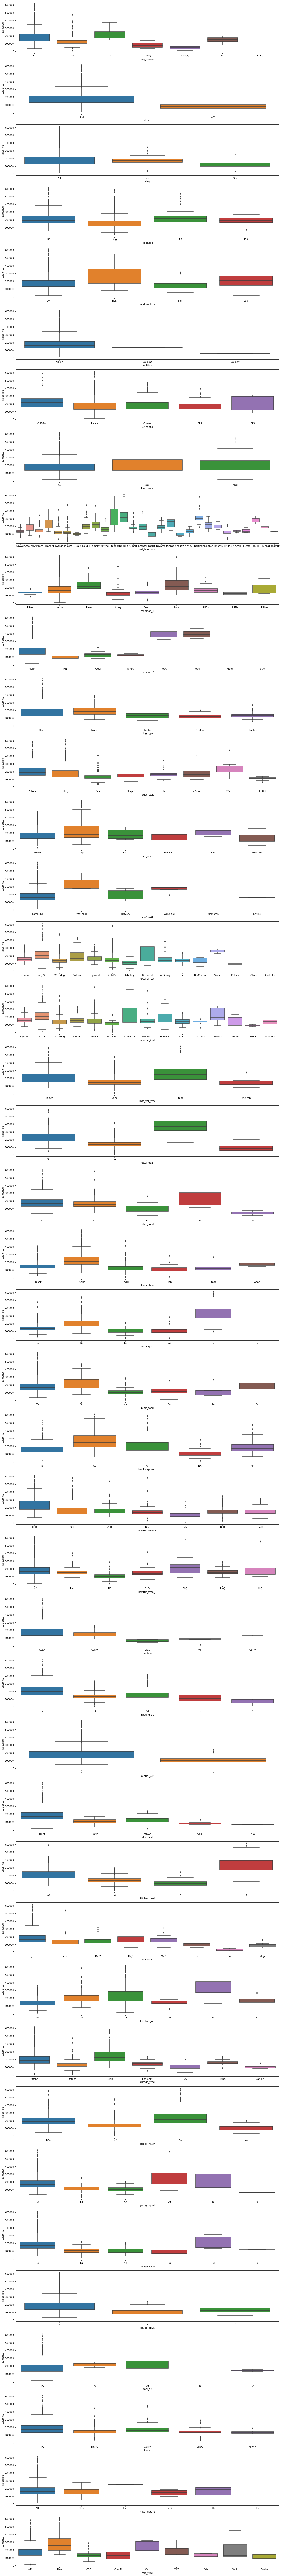

In [17]:
fig, ax = plt.subplots(42, 1, figsize=(20,200))
sns.boxplot(x=train['ms_zoning'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['street'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['alley'], y=train['saleprice'], ax=ax[2])
sns.boxplot(x=train['lot_shape'], y=train['saleprice'], ax=ax[3])
sns.boxplot(x=train['land_contour'], y=train['saleprice'], ax=ax[4])
sns.boxplot(x=train['utilities'], y=train['saleprice'], ax=ax[5])
sns.boxplot(x=train['lot_config'], y=train['saleprice'], ax=ax[6])
sns.boxplot(x=train['land_slope'], y=train['saleprice'], ax=ax[7])
sns.boxplot(x=train['neighborhood'], y=train['saleprice'], ax=ax[8])
sns.boxplot(x=train['condition_1'], y=train['saleprice'], ax=ax[9])
sns.boxplot(x=train['condition_2'], y=train['saleprice'], ax=ax[10])
sns.boxplot(x=train['bldg_type'], y=train['saleprice'], ax=ax[11])
sns.boxplot(x=train['house_style'], y=train['saleprice'], ax=ax[12])
sns.boxplot(x=train['roof_style'], y=train['saleprice'], ax=ax[13])
sns.boxplot(x=train['roof_matl'], y=train['saleprice'], ax=ax[14])
sns.boxplot(x=train['exterior_1st'], y=train['saleprice'], ax=ax[15])
sns.boxplot(x=train['exterior_2nd'], y=train['saleprice'], ax=ax[16])
sns.boxplot(x=train['mas_vnr_type'], y=train['saleprice'], ax=ax[17])
sns.boxplot(x=train['exter_qual'], y=train['saleprice'], ax=ax[18])
sns.boxplot(x=train['exter_cond'], y=train['saleprice'], ax=ax[19])
sns.boxplot(x=train['foundation'], y=train['saleprice'], ax=ax[20])
sns.boxplot(x=train['bsmt_qual'], y=train['saleprice'], ax=ax[21])
sns.boxplot(x=train['bsmt_cond'], y=train['saleprice'], ax=ax[22])
sns.boxplot(x=train['bsmt_exposure'], y=train['saleprice'], ax=ax[23])
sns.boxplot(x=train['bsmtfin_type_1'], y=train['saleprice'], ax=ax[24])
sns.boxplot(x=train['bsmtfin_type_2'], y=train['saleprice'], ax=ax[25])
sns.boxplot(x=train['heating'], y=train['saleprice'], ax=ax[26])
sns.boxplot(x=train['heating_qc'], y=train['saleprice'], ax=ax[27])
sns.boxplot(x=train['central_air'], y=train['saleprice'], ax=ax[28])
sns.boxplot(x=train['electrical'], y=train['saleprice'], ax=ax[29])
sns.boxplot(x=train['kitchen_qual'], y=train['saleprice'], ax=ax[30])
sns.boxplot(x=train['functional'], y=train['saleprice'], ax=ax[31])
sns.boxplot(x=train['fireplace_qu'], y=train['saleprice'], ax=ax[32])
sns.boxplot(x=train['garage_type'], y=train['saleprice'], ax=ax[33])
sns.boxplot(x=train['garage_finish'], y=train['saleprice'], ax=ax[34])
sns.boxplot(x=train['garage_qual'], y=train['saleprice'], ax=ax[35])
sns.boxplot(x=train['garage_cond'], y=train['saleprice'], ax=ax[36])
sns.boxplot(x=train['paved_drive'], y=train['saleprice'], ax=ax[37])
sns.boxplot(x=train['pool_qc'], y=train['saleprice'], ax=ax[38])
sns.boxplot(x=train['fence'], y=train['saleprice'], ax=ax[39])
sns.boxplot(x=train['misc_feature'], y=train['saleprice'], ax=ax[40])
sns.boxplot(x=train['sale_type'], y=train['saleprice'], ax=ax[41]);

In [18]:
train.isnull().sum().sort_values(ascending = False).loc[lambda x: x >0]

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_exposure       4
bsmt_half_bath      2
bsmt_full_bath      2
total_baths         2
bsmtfin_type_2      2
bsmt_qual           1
garage_area         1
garage_finish       1
bsmtfin_type_1      1
bsmt_cond           1
garage_cond         1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
garage_qual         1
garage_cars         1
bsmt                1
home_sqft           1
dtype: int64

In [19]:
test.isnull().sum().sort_values(ascending = False).loc[lambda x: x >0]

lot_frontage     160
garage_yr_blt     45
electrical         1
garage_finish      1
mas_vnr_type       1
mas_vnr_area       1
dtype: int64

In [20]:
test['street'].value_counts()

Pave    873
Grvl      5
Name: street, dtype: int64

In [21]:
X = train.drop(columns=['id','pid', 'saleprice'])
y = train['saleprice']

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=123)
X_train.shape, X_test.shape, test.shape

((1538, 83), (513, 83), (878, 85))

In [23]:
X_train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,total_baths,home_sqft,total_porches,bsmt,sqft
1599,80,RL,88.0,15400,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,5,1961,1961,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,Gd,No,Unf,0.0,Unf,0.0,552.0,552.0,GasA,TA,Y,SBrkr,904,611,259,1774,0.0,0.0,2,0,4,1,TA,8,Typ,1,TA,Attchd,1961.0,Unf,1.0,384.0,TA,TA,Y,290,40,0,0,0,0,NA,NA,NA,0,7,2009,WD,2.0,1774.0,40,0.0,0
1162,20,RL,66.0,13695,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,646.0,Unf,0.0,468.0,1114.0,GasA,Ex,Y,SBrkr,1114,0,0,1114,1.0,0.0,1,1,3,1,Gd,6,Typ,0,NA,Detchd,2004.0,Unf,2.0,576.0,TA,TA,Y,0,102,0,0,0,0,NA,NA,NA,0,6,2008,WD,3.0,1760.0,102,0.0,0
803,90,RL,75.0,8604,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,7,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,124.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,941.0,Unf,0.0,0.0,941.0,GasA,Gd,Y,SBrkr,941,0,0,941,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,Attchd,1978.0,Unf,2.0,564.0,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,11,2009,WD,2.0,1882.0,40,0.0,0
785,50,RM,50.0,6000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,276.0,Unf,0.0,569.0,845.0,GasA,TA,Y,SBrkr,866,430,0,1296,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Detchd,1980.0,Unf,2.0,576.0,TA,TA,Y,0,0,175,0,0,0,NA,NA,NA,0,7,2007,WD,1.0,1572.0,175,0.0,0
711,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,MetalSd,MetalSd,BrkFace,132.0,TA,TA,CBlock,TA,TA,No,ALQ,991.0,Unf,0.0,50.0,1041.0,GasA,Ex,Y,SBrkr,1041,0,0,1041,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,1.0,270.0,TA,TA,Y,224,88,0,0,0,0,NA,MnPrv,NA,0,7,2009,WD,2.0,2032.0,88,0.0,0


# Feature Engineering #

In [24]:
si = SimpleImputer(strategy='most_frequent')
X_train_filled = si.fit_transform(X_train)
X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)
X_test_filled = si.transform(X_test)
X_test_filled = pd.DataFrame(X_test_filled, columns = si.feature_names_in_)

# Preprocessing #

In [25]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
smart_encoder = make_column_transformer((ohe, categorical), remainder='passthrough', verbose_feature_names_out=False)
X_train_encoded = smart_encoder.fit_transform(X_train_filled)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=smart_encoder.get_feature_names_out())
X_test_encoded = smart_encoder.transform(X_test_filled)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=smart_encoder.get_feature_names_out())

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_encoded)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = ss.transform(X_test_encoded)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_encoded.columns)

# Modeling and Evaluation #

In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [27]:
print(f"Training R2: {lr.score(X_train_scaled, y_train)}")
print(f"Testing R2: {lr.score(X_test_scaled, y_test)}")
print(f"Cross val R2: {cross_val_score(lr, X_train_scaled, y_train).mean()}")

Training R2: 0.945095236738477
Testing R2: -3.343916656924308e+19
Cross val R2: -4.186875323365771e+23


In [28]:
print(f"Training RMSE: {mean_squared_error(y_train, lr.predict(X_train_scaled))**0.5}")
print(f"Testing RMSE: {mean_squared_error(y_test, lr.predict(X_test_scaled))**0.5}")
print(f"Cross val RMSE: {cross_val_score(lr, X_train_scaled, y_train, scoring='neg_root_mean_squared_error').mean()*-1}")

Training RMSE: 19226.984229243277
Testing RMSE: 401085045085947.56
Cross val RMSE: 2.7026995207872228e+16


In [29]:
lasso = LassoCV(alphas = np.arange(0.001,10,1))
lasso.fit(X_train_scaled,y_train)
print(lasso.alpha_)

9.000999999999998


In [30]:
print(f"Training R2: {lasso.score(X_train_scaled, y_train)}")
print(f"Testing R2: {lasso.score(X_test_scaled, y_test)}")
print(f"Cross val R2: {cross_val_score(lasso, X_train_scaled, y_train).mean()}")

Training R2: 0.9447833336957001
Testing R2: 0.6998963389105479
Cross val R2: 0.8582777186047992


In [31]:
print(f"Training RMSE: {mean_squared_error(y_train, lasso.predict(X_train_scaled))**0.5}")
print(f"Testing RMSE: {mean_squared_error(y_test, lasso.predict(X_test_scaled))**0.5}")
print(f"Cross val RMSE: {cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_root_mean_squared_error').mean()*-1}")

Training RMSE: 19281.519225457774
Testing RMSE: 37996.569959838715
Cross val RMSE: 30030.590742729033


In [32]:
ridge = RidgeCV(alphas= np.logspace(0,5,100))
ridge.fit(X_train_scaled,y_train)
print(ridge.alpha_)

265.6087782946687


In [33]:
print(f"Training R2: {ridge.score(X_train_scaled, y_train)}")
print(f"Testing R2: {ridge.score(X_test_scaled, y_test)}")
print(f"Cross val R2: {cross_val_score(ridge, X_train_scaled, y_train).mean()}")

Training R2: 0.931487915636911
Testing R2: 0.7698268818139089
Cross val R2: 0.881155954219569


In [34]:
print(f"Training RMSE: {mean_squared_error(y_train, ridge.predict(X_train_scaled))**0.5}")
print(f"Testing RMSE: {mean_squared_error(y_test, ridge.predict(X_test_scaled))**0.5}")
print(f"Cross val RMSE: {cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_root_mean_squared_error').mean()*-1}")

Training RMSE: 21477.79775915752
Testing RMSE: 33276.37787868425
Cross val RMSE: 27815.770378212055


In [35]:
EN = ElasticNet()
EN.fit(X_train_scaled,y_train)

ElasticNet()

In [36]:
print(f"Training R2: {EN.score(X_train_scaled, y_train)}")
print(f"Testing R2: {EN.score(X_test_scaled, y_test)}")
print(f"Cross val R2: {cross_val_score(EN, X_train_scaled, y_train).mean()}")

Training R2: 0.9149653037768524
Testing R2: 0.7990410648982382
Cross val R2: 0.878264301367612


In [37]:
print(f"Training RMSE: {mean_squared_error(y_train, EN.predict(X_train_scaled))**0.5}")
print(f"Testing RMSE: {mean_squared_error(y_test, EN.predict(X_test_scaled))**0.5}")
print(f"Cross val RMSE: {cross_val_score(EN, X_train_scaled, y_train, scoring='neg_root_mean_squared_error').mean()*-1}")

Training RMSE: 23927.8810308904
Testing RMSE: 31092.98427034133
Cross val RMSE: 28265.875975961622
